In [114]:
import pandas as pd
import seaborn as sns

In [115]:
benchmark = pd.read_csv('modifiable-benchmark.csv')
benchmark.insert(1, 'Path Present', benchmark['Path Length'] != 0, True)
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Algorithm       4000 non-null   object 
 1   Path Present    4000 non-null   bool   
 2   Path Length     4000 non-null   int64  
 3   Duration (µs)   4000 non-null   float64
 4   Average Degree  4000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 129.0+ KB


In [116]:
benchmark_path = benchmark[benchmark['Path Present']]
benchmark_path.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2448 entries, 1 to 3998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Algorithm       2448 non-null   object 
 1   Path Present    2448 non-null   bool   
 2   Path Length     2448 non-null   int64  
 3   Duration (µs)   2448 non-null   float64
 4   Average Degree  2448 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 98.0+ KB


In [117]:
benchmark_nopath = benchmark[benchmark['Path Present'] == False]
benchmark_nopath.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1552 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Algorithm       1552 non-null   object 
 1   Path Present    1552 non-null   bool   
 2   Path Length     1552 non-null   int64  
 3   Duration (µs)   1552 non-null   float64
 4   Average Degree  1552 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 62.1+ KB


# Duration of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Duration (µs)'>

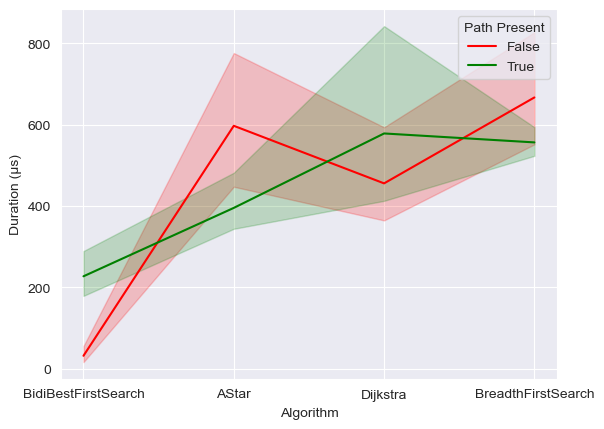

In [118]:
sns.lineplot(benchmark, x='Algorithm', y='Duration (µs)', hue='Path Present', palette=['red', 'green'])

# Relationship between path length and duration

<Axes: xlabel='Path Length', ylabel='Duration (µs)'>

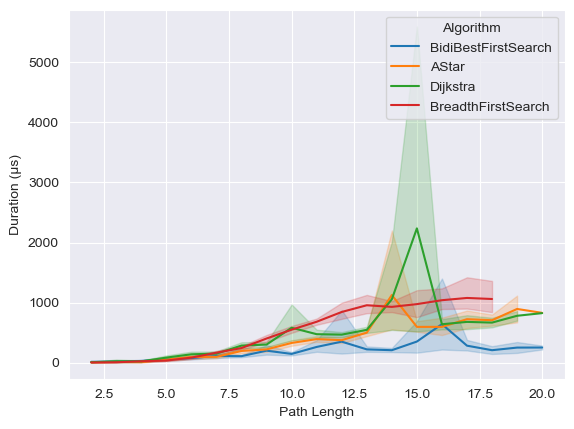

In [119]:
sns.lineplot(benchmark_path, x='Path Length', y='Duration (µs)', hue='Algorithm')

# Relationship between average degree and duration

In [ ]:
sns.lineplot(benchmark_path, x='Average Degree', y='Duration (µs)', hue='Algorithm')

# Relationship between path length and average degree

In [ ]:
sns.lineplot(benchmark, x='Path Length', y='Average Degree')

In [ ]:
sns.histplot(benchmark[benchmark['Duration (µs)'] < 50], x='Duration (µs)', hue='Algorithm')

# Correlation Heatmap

In [ ]:
sns.heatmap(benchmark.corr(method='spearman', numeric_only=True), annot=True)